## PS: Use the dataset named as Advertising Budget and Sales.csv . Build a Linear Regression model using TV budget, Radio Budget and Newspaper Budget to predict the Sales. 

* 1. What is the R-square value
* 2. What is the RMSE value
* 3. What would be the sales, if an organization decides to allocate 150 as TV budget, 50 as radao budget and 60 as Newspaper Budget.

In [22]:
# importing libraries

import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import math


In [2]:
ad_budget_sale = pd.read_excel('F:\Skillenable\Data frames\Advertising budget and sales.xlsx')
ad_budget_sale.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# creating data on budget

budget_1 = ad_budget_sale[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
budget_1.head()                           

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [4]:
budget_1.info()
budget_1.describe()    #checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [5]:
# define input and output

Y = ad_budget_sale[['Sales ($)']]
X = budget_1[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# creating test and train data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=51)
len(X_train), len(X_test), len(Y_train), len(Y_test)

(160, 40, 160, 40)

In [10]:
# build MLR model

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

In [11]:
model = mlr.fit(X_train, Y_train)

model

LinearRegression()

<AxesSubplot:>

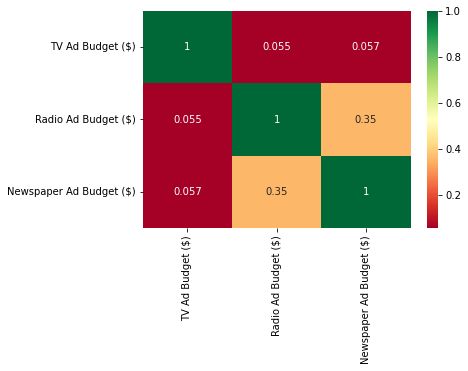

In [12]:
# create a correlation plot between all the variables.

import seaborn as sns

Matrix = budget_1.corr()

Matrix

sns.heatmap(Matrix, annot = True, cmap = 'RdYlGn')

In [13]:
#slope (m)

model.coef_

array([[0.04665249, 0.17923723, 0.00087366]])

In [14]:
#intercept (c)

model.intercept_

array([2.96667407])

In [15]:
#R-sq value

model.score(X_train, Y_train)

0.8935562677321687

In [16]:

# R-sq value of my model is ~89.4% 

In [17]:
X_test.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
148,38.0,40.3,11.9
104,238.2,34.3,5.3
4,180.8,10.8,58.4
7,120.2,19.6,11.6
192,17.2,4.1,31.6


In [18]:
Y_test.head()

,Sales ($)
148,10.9
104,20.7
4,12.9
7,13.2
192,5.9


In [20]:
# prediction value
Y_test['Sales_pred'] = model.predict(X_test)
Y_test.head()

,Sales ($),Sales_pred
148,10.9,11.973126
104,20.7,20.231765
4,12.9,13.388229
7,13.2,12.097488
192,5.9,4.531577


## PS: What is the RMSE value



In [21]:
Y_test['Error'] = Y_test['Sales_pred'] - Y_test['Sales ($)']
Y_test['Sq_Error'] = (Y_test['Error']) **2          
Error_mean = Y_test['Sq_Error'].mean()


In [23]:
## Find the Square root value of Error_mean

RMSE = math.sqrt(Error_mean)
RMSE

# RMSE value = 1.4544125436585371



1.4544125436585371

## PS:  What would be the sales, if an organization decides to allocate 150 as TV budget, 50 as radao budget and 60 as Newspaper Budget.

In [24]:
# Creating validation data
val_data = pd.DataFrame({"TV Ad Budget ($)" : [150],
                        "Radio Ad Budget ($)": [50],
                        "Newspaper Ad Budget ($)": [60]})

In [25]:
# predicting sales

predict_sales = model.predict(val_data)
predict_sales

array([[18.97882892]])

In [26]:
# Upper Range of Prediction

print('Upper Range of Sale is ', predict_sales + RMSE)

Upper Range of Sale is  [[20.43324146]]


In [27]:
# Lower Range of Prediction

print('Lower Range of Sale is ', predict_sales - RMSE)

Lower Range of Sale is  [[17.52441638]]
